# Animáció készítése pythonnal

A következőkben arra láthatunk példákat, hogy hogy hogyan tudunk egyszerű animációkat készíteni a már korábban megismert `python`, `numpy` és `matplotlib` segítségével. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
two_pi = np.pi * 2
x_vals = np.arange(0.0, two_pi, 0.001)
y_vals = np.sin(x_vals)
ax = plt.axis([0, two_pi, -1.1, 1.1])
moving_point, = plt.plot([0], [np.sin(0)], marker = 'o', markerfacecolor="#ffc819", markeredgecolor='w', markersize = 100)

def animate_point(i):
    moving_point.set_data(i, np.sin(i))
    return moving_point,

fr = np.arange(0.0, two_pi, 0.1)
myAnimation = animation.FuncAnimation(fig, animate_point, frames=fr, repeat=True, blit=True, interval=10)
plt.show()

<Figure size 640x480 with 1 Axes>

![circle](data/circle.gif)

Az animációt `gif`-ként elmenteni a következő kóddal lehet, de ez nem végtelenített lejátszást generál.

```python
from matplotlib.animation import PillowWriter
myAnimation.save("circle.gif", writer=PillowWriter(fps=24))
```

### loop - végtelen lejátszású gif:

A nem végtelen lejátszás ismer Issue a matpltlibbben. Ezt később javítani fogják, de jelenleg a legjobb, amit thetünk, hogy a felüldefiniáljuk a `PillowWriter`-t egy `LoopingPillowWriter`-rel, valahogy így:

Issue: https://github.com/t-makaro/animatplot/issues/24


```python
from matplotlib.animation import PillowWriter

class LoopingPillowWriter(PillowWriter):
    def finish(self):
        self._frames[0].save(
            self._outfile, save_all=True, append_images=self._frames[1:],
            duration=int(1000 / self.fps), loop=0)


myAnimation.save("line.gif", writer=LoopingPillowWriter(fps=24))
```


### Nézzünk egy másik példát:

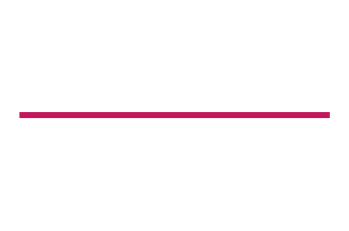

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
ten_pi = np.pi * 10
x_vals = np.arange(0.0, ten_pi, 0.001)
y_vals = np.sin(x_vals)
plt.ylim([-5, 5])
plt.xticks([])
plt.yticks([])
ax.axis('off')

line, = plt.plot(x_vals, color="#c2185b", linewidth = 6)

def animate_line(i):
    if i > 10:
        i = 20 - i
    new_val = i / 5 * np.sin(x_vals)
    line.set_ydata(new_val)
    return [line]

myAnimation = animation.FuncAnimation(fig, animate_line, 20, blit=True)
# from matplotlib.animation import PillowWriter
# myAnimation.save("line.gif", writer=PillowWriter(fps=24))
plt.show()

![line](data/line.gif)

### _Used sources_ / Felhasznált források
- [Shannon Turner: Python lessons repository](https://github.com/shannonturner/python-lessons) MIT license (c) Shannon Turner 2013-2014
- [Siki Zoltán: Python mogyoróhéjban](http://www.agt.bme.hu/gis/python/python_oktato.pdf) GNU FDL license (c) Siki Zoltán
- [BME AUT](https://github.com/bmeaut) MIT License Copyright (c) BME AUT 2016-2018
- [Matplotlib animation API](https://matplotlib.org/3.1.1/api/animation_api.html)